In [1]:
pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached pyod-1.0.3-py3-none-any.whl
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
  Using cached kmodes-0.12.1-py2.py3-none-any.whl (20 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached spacy-2.3.7-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached mlflow-1.27.0-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [3]:
import numpy
print(numpy.__version__)

1.19.5


In [7]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pycaret.datasets import get_data
dataset = get_data('cardata')

,fCar_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
data = dataset.sample(frac=0.8, random_state=0).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (241, 9)
Unseen Data For Predictions: (60, 9)


In [15]:
pip install Jinja2

In [19]:
pip install jinja2==3.0.1

  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.0.1 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.1.1 which is incompatible.


In [3]:
from pycaret.regression import *

In [5]:
exp_reg101 = setup(data = data, target = 'Selling_Price', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Selling_Price
2,Original Data,"(241, 9)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(168, 88)"


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.0386,4.8766,1.8782,0.8541,0.1988,0.2462,0.0670
gbr,Gradient Boosting Regressor,1.0681,4.6794,1.8409,0.8451,0.2095,0.2869,0.0190
dt,Decision Tree Regressor,1.1517,5.3862,1.9472,0.8031,0.2257,0.2731,0.0050
ada,AdaBoost Regressor,1.4154,6.7260,2.2358,0.7848,0.3216,0.7290,0.0250
et,Extra Trees Regressor,1.1043,7.6414,2.2573,0.7828,0.2174,0.2321,0.0640
br,Bayesian Ridge,1.3299,6.4610,2.2130,0.7762,0.3538,1.0214,0.0080
ridge,Ridge Regression,1.3726,6.7609,2.2716,0.7516,0.3821,1.1613,0.0050
lasso,Lasso Regression,1.6435,8.2294,2.5058,0.7203,0.4009,1.0595,0.0070
en,Elastic Net,1.6376,8.2665,2.5055,0.7200,0.3989,1.0514,0.0070
omp,Orthogonal Matching Pursuit,1.3877,7.3867,2.3697,0.7171,0.3660,1.0000,0.0050


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [15]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0982,4.5017,2.1217,0.8750,0.1574,0.2957
1,2.3390,19.5551,4.4221,0.6661,0.3953,0.4363
2,0.7146,1.2564,1.1209,0.8882,0.1686,0.2064
3,0.6086,0.9325,0.9656,0.9476,0.1598,0.2234
4,1.6929,11.3936,3.3754,0.8002,0.2347,0.2479
5,0.6539,1.5145,1.2306,0.8575,0.1424,0.1501
6,1.4265,6.5419,2.5577,0.8853,0.2073,0.1969
7,0.8190,1.4217,1.1923,0.8710,0.1606,0.2138
8,0.4557,0.5822,0.7630,0.9055,0.2066,0.3406


# 
## Tune Random Forest Regressor Model
tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize R2 but this can be changed using the optimize parameter. For example: tune_model('dt', optimize = 'MAE') will search for the hyperparameters of a Decision Tree that result in the lowest MAE (lower is better). For the purposes of this example, we have used the default metric R2 for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a regressor is beyond the scope of this tutorial but if you would like to learn more about it, you can click here to develop an understanding on regression error metrics.

In [16]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2843,5.7689,2.4019,0.8398,0.2465,0.6886
1,2.6487,24.3105,4.9306,0.5849,0.4462,0.5372
2,0.9356,1.7407,1.3194,0.8451,0.2347,0.4283
3,0.7113,1.1683,1.0809,0.9343,0.2079,0.4114
4,1.9700,17.4323,4.1752,0.6942,0.2578,0.2828
5,0.7930,1.9301,1.3893,0.8184,0.1740,0.2063
6,1.1799,3.1953,1.7875,0.9440,0.2033,0.3230
7,0.7472,1.0167,1.0083,0.9078,0.1791,0.3834
8,0.6332,0.8246,0.9081,0.8661,0.2231,0.3954


In [17]:
print(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


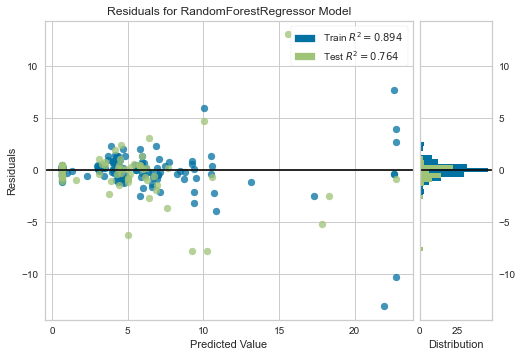

In [18]:
plot_model(tuned_rf)

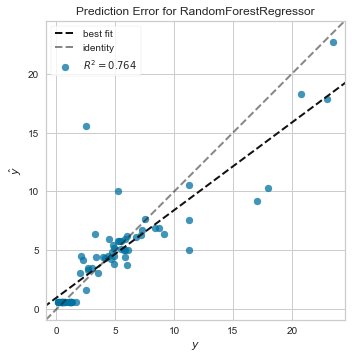

In [19]:
plot_model(tuned_rf, plot = 'error')

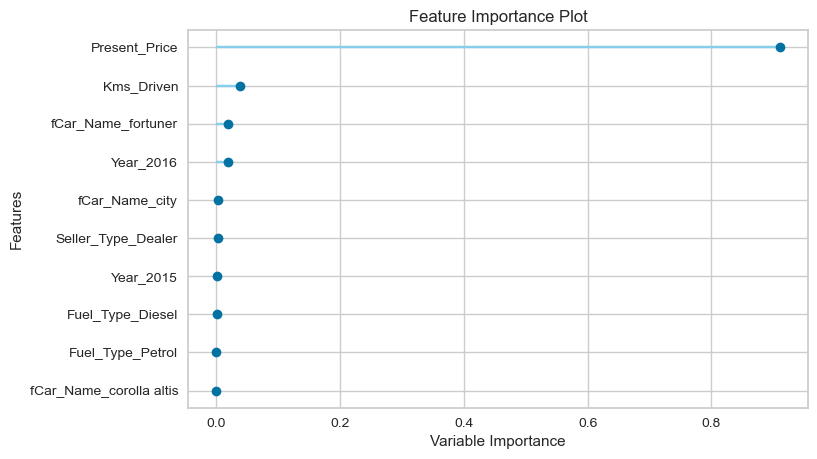

In [20]:
plot_model(tuned_rf, plot='feature')